<a href="https://www.kaggle.com/code/rrb8695/cities-and-towns-of-germany?scriptVersionId=168270523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deutschland-cities/Deutschland_Cities.csv


In [2]:
df = pd.read_csv("/kaggle/input/deutschland-cities/Deutschland_Cities.csv")
df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0
...,...,...,...,...,...,...,...,...,...
607,Rotenburg,53.0851,9.3879,Germany,DE,Lower Saxony,minor,NaN,NaN
608,Karlstadt,49.9603,9.7724,Germany,DE,Bavaria,minor,NaN,NaN
609,Neustadt,49.5656,8.8437,Germany,DE,Hesse,minor,NaN,NaN
610,Homberg,51.0299,9.4026,Germany,DE,Hesse,minor,NaN,NaN


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

In [5]:
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0


In [6]:
df.tail()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
607,Rotenburg,53.0851,9.3879,Germany,DE,Lower Saxony,minor,NaN,NaN
608,Karlstadt,49.9603,9.7724,Germany,DE,Bavaria,minor,NaN,NaN
609,Neustadt,49.5656,8.8437,Germany,DE,Hesse,minor,NaN,NaN
610,Homberg,51.0299,9.4026,Germany,DE,Hesse,minor,NaN,NaN
611,Garmisch-Partenkirchen,47.4985,11.1044,Germany,DE,Bavaria,minor,NaN,NaN


In [7]:
df.shape

(612, 9)

In [8]:
df.columns

Index(['city', 'lat', 'lng', 'country', 'iso2', 'admin_name', 'capital',
       'population', 'population_proper'],
      dtype='object')

In [9]:
len(df.columns)

9

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               612 non-null    object 
 1   lat                612 non-null    float64
 2   lng                612 non-null    float64
 3   country            612 non-null    object 
 4   iso2               612 non-null    object 
 5   admin_name         612 non-null    object 
 6   capital            358 non-null    object 
 7   population         602 non-null    float64
 8   population_proper  602 non-null    float64
dtypes: float64(4), object(5)
memory usage: 43.2+ KB


In [11]:
df.describe()

,lat,lng,population,population_proper
count,612.000000,612.000000,6.020000e+02,6.020000e+02
mean,50.788434,9.350428,7.681314e+04,7.637644e+04
std,1.623459,2.063536,1.994928e+05,1.984961e+05
min,47.498500,6.083800,5.312000e+03,5.312000e+03
25%,49.480400,7.642525,2.608500e+04,2.608500e+04
50%,50.976700,8.910500,3.620850e+04,3.620850e+04
75%,51.849600,10.874375,5.887200e+04,5.868850e+04
max,54.781900,14.987200,3.644826e+06,3.644826e+06


Listing down all columns

In [12]:
all_columns = list(df.columns)
all_columns 


['city',
 'lat',
 'lng',
 'country',
 'iso2',
 'admin_name',
 'capital',
 'population',
 'population_proper']

What is the total population in the dataset?

In [13]:
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0


In [14]:
population_column = df["population"]
population_column

0      3644826.0
1      1841179.0
2      1471508.0
3      1085664.0
4       753056.0
         ...    
607          NaN
608          NaN
609          NaN
610          NaN
611          NaN
Name: population, Length: 612, dtype: float64

In [15]:
type(population_column)

pandas.core.series.Series

In [16]:
dir(population_column)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__rep

In [17]:
population_column.sum()

46241511.0

In [18]:
# What is the total population in the dataset?
df["population"].sum()

46241511.0

In [19]:

# Which city has the highest population?
df[df["population"] == df["population"].max()]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0


In [20]:
max_value = df["population"].max()
max_value

3644826.0

In [21]:
df[df["population"] == max_value]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0


In [22]:

# Which city has the lowest population?
df[df["population"] == df["population"].min()]


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
601,Cochem,50.1469,7.1667,Germany,DE,Rhineland-Palatinate,minor,5312.0,5312.0


In [23]:

# What is the average population of all the cities?
df["population"].mean()

76813.14119601328

In [24]:
df["population"].mean()

76813.14119601328

In [25]:
# How many capital cities are in the dataset?
list(df["capital"].unique())

['primary', 'admin', nan, 'minor']

In [26]:
df["capital"].value_counts()

capital
minor      342
admin       15
primary      1
Name: count, dtype: int64

In [27]:
df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0
...,...,...,...,...,...,...,...,...,...
607,Rotenburg,53.0851,9.3879,Germany,DE,Lower Saxony,minor,NaN,NaN
608,Karlstadt,49.9603,9.7724,Germany,DE,Bavaria,minor,NaN,NaN
609,Neustadt,49.5656,8.8437,Germany,DE,Hesse,minor,NaN,NaN
610,Homberg,51.0299,9.4026,Germany,DE,Hesse,minor,NaN,NaN


Give me the administrative states with its capitals.

In [28]:
admin_capital = df[(df["capital"] == "admin") | (df["capital"] == "primary")]
admin_capital[["admin_name", "city"]]


,admin_name,city
0,Berlin,Berlin
1,Hamburg,Hamburg
2,Bavaria,Munich
5,Bremen,Bremen
6,Baden-Württemberg,Stuttgart
7,North Rhine-Westphalia,Düsseldorf
10,Saxony,Dresden
12,Lower Saxony,Hannover
23,Hesse,Wiesbaden
27,Schleswig-Holstein,Kiel


In [29]:
print("The number of total cities in dataframe :",len(list(df["city"].unique())))

The number of total cities in dataframe : 607


In [30]:

# What is the average population of capital cities?
df[df["capital"] == "admin"]["population"].mean()

532871.9333333333

Give me the list of those cities whose population is greater than mean population in the dataset.

In [31]:
df["population"]

0      3644826.0
1      1841179.0
2      1471508.0
3      1085664.0
4       753056.0
         ...    
607          NaN
608          NaN
609          NaN
610          NaN
611          NaN
Name: population, Length: 612, dtype: float64

In [32]:
mean_population_of_dataset = df["population"].mean()
print("Mean population of dataset is :",mean_population_of_dataset)

Mean population of dataset is : 76813.14119601328


In [33]:
df[df["population"] > mean_population_of_dataset]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0
...,...,...,...,...,...,...,...,...,...
103,Norderstedt,53.7064,10.0103,Germany,DE,Schleswig-Holstein,NaN,79159.0,79159.0
104,Delmenhorst,53.0506,8.6317,Germany,DE,Lower Saxony,minor,77607.0,77607.0
105,Bamberg,49.8917,10.8917,Germany,DE,Bavaria,minor,77592.0,77592.0
106,Viersen,51.2556,6.3917,Germany,DE,North Rhine-Westphalia,minor,76905.0,76905.0


In [34]:
import matplotlib.pyplot as plt

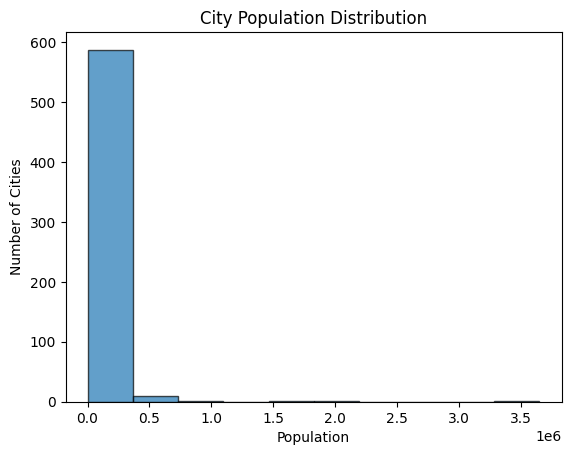

In [35]:

# What is the distribution of city populations? (Create a histogram)
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'population' column


# Create a histogram
plt.hist(df['population'], bins=10, edgecolor='k', alpha=0.7)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Number of Cities')
plt.title('City Population Distribution')

# Show the histogram
plt.show()



In [36]:
# Which country has the most cities in the dataset?

list(df["country"].unique())

['Germany']

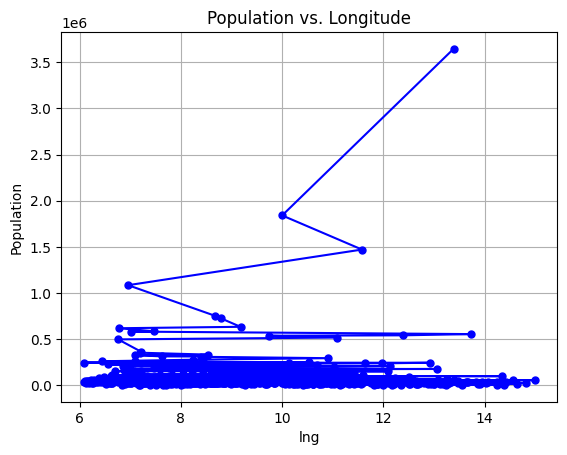

In [37]:

# What is the relationship between langitude (lat) and population?



# Assuming you have lat_data and popul_data already defined
lag_data = df["lng"]
popul_data = df["population"]

# Create a line chart
plt.plot(lag_data, popul_data, marker='o', linestyle='-', color='b', markersize=5)

# Add labels and title
plt.xlabel('lng')
plt.ylabel('Population')
plt.title('Population vs. Longitude')

# Show the line chart
plt.grid(True)
plt.show()


In [38]:
df["lat"].corr(df["population"])

# Answer : There is no correaltion

0.0651516024675942

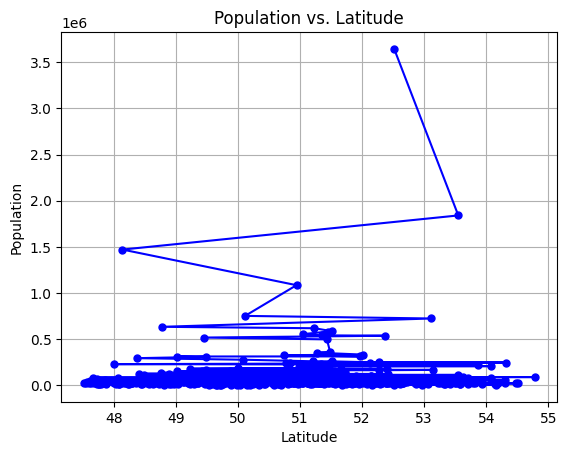

In [39]:
# What is the relationship between longitude (lng) and population?

# Assuming you have lat_data and popul_data already defined
lat_data = df["lat"]
popul_data = df["population"]

# Create a line chart
plt.plot(lat_data, popul_data, marker='o', linestyle='-', color='b', markersize=5)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Population')
plt.title('Population vs. Latitude')

# Show the line chart
plt.grid(True)
plt.show()

In [40]:
df["lng"].corr(df["population"])

# Answer : There is no correaltion

0.02406438435743983

In [41]:

# Is there a correlation between latitude and longitude?
df["lng"].corr(df["lat"])

# Answer : There is no correaltion

-0.009921762266200512

In [42]:
# Which admin_name has the most cities?
df["admin_name"].value_counts().reset_index().head()

,admin_name,count
0,North Rhine-Westphalia,169
1,Bavaria,85
2,Baden-Württemberg,79
3,Lower Saxony,66
4,Hesse,48


In [43]:
# How many cities have a population greater than 1 million?
df[df["population"] > 1000000]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0


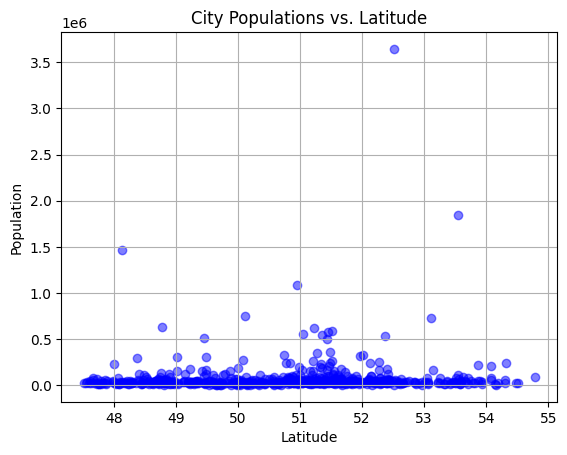

In [44]:
import matplotlib.pyplot as plt

# Assuming you have lat_data and popul_data already defined
lat_data = df["lat"]
popul_data = df["population"]

# Create a scatter plot
plt.scatter(lat_data, popul_data, alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Population')
plt.title('City Populations vs. Latitude')

# Show the scatter plot
plt.grid(True)
plt.show()


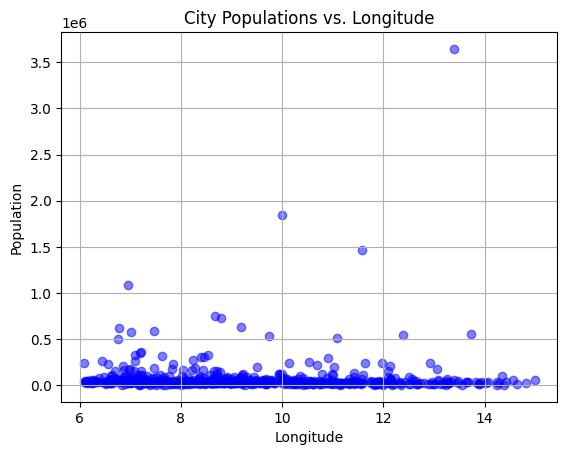

In [45]:
# Create a scatter plot of city populations vs. longitude.

import matplotlib.pyplot as plt

# Assuming you have lat_data and popul_data already defined
lat_data = df["lng"]
popul_data = df["population"]

# Create a scatter plot
plt.scatter(lat_data, popul_data, alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Population')
plt.title('City Populations vs. Longitude')

# Show the scatter plot
plt.grid(True)
plt.show()


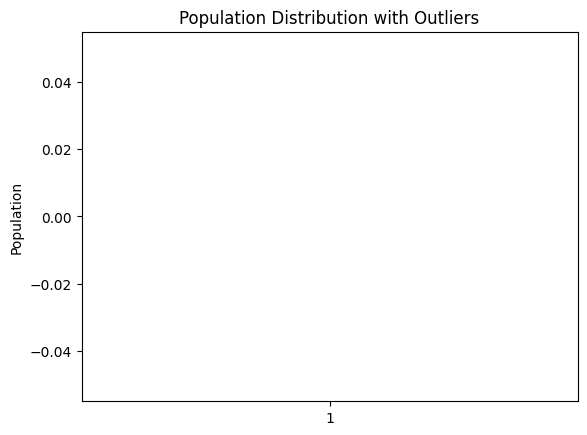

In [46]:

# Are there any outliers in terms of population? Identify and visualize them.

import matplotlib.pyplot as plt

# Assuming you have the 'population' column in a variable named popul_data
popul_data = df["population"]

# Create a box plot
plt.boxplot(popul_data)

# Add labels and title
plt.ylabel('Population')
plt.title('Population Distribution with Outliers')

# Show the box plot
plt.show()

# I want to visulise the outlier of a column. What are different ways do it with Matplotlib or seaborn ?


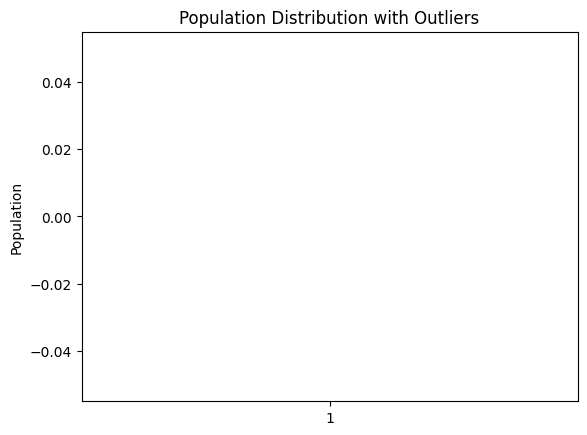

In [47]:
import matplotlib.pyplot as plt

# Assuming you have the 'population' column in a variable named popul_data
popul_data = df["population"]

# Create a box plot
plt.boxplot(popul_data)

# Add labels and title
plt.ylabel('Population')
plt.title('Population Distribution with Outliers')

# Show the box plot
plt.show()


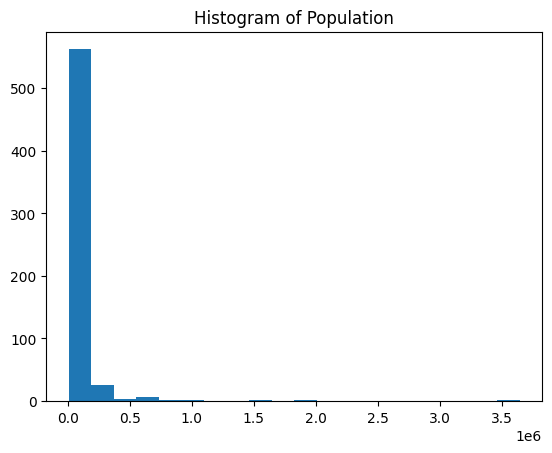

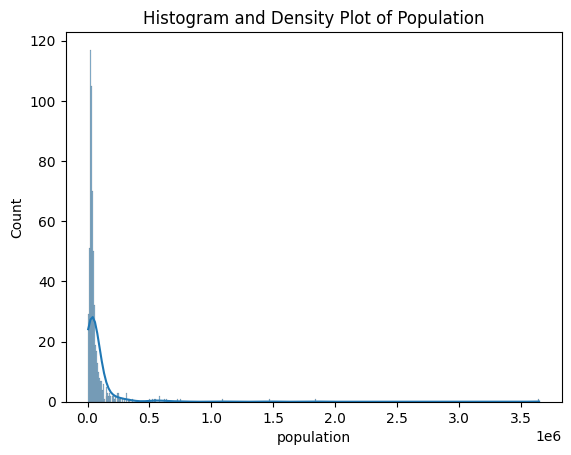

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using Matplotlib
plt.hist(df['population'], bins=20)
plt.title('Histogram of Population')
plt.show()

# Using Seaborn
sns.histplot(df['population'], kde=True)
plt.title('Histogram and Density Plot of Population')
plt.show()


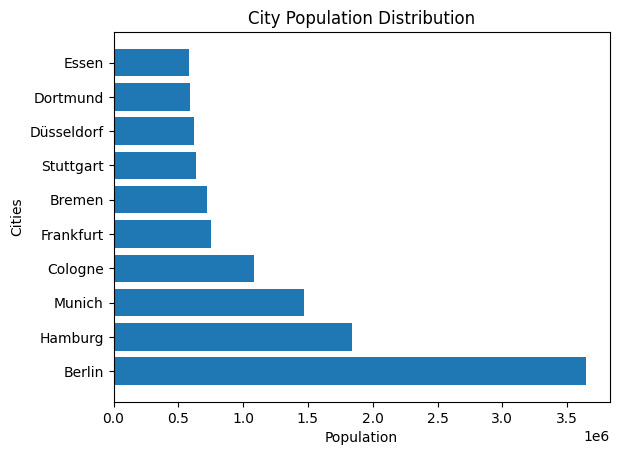

In [49]:
# Calculate and visualize the top 10 cities with the highest population.
updated_df = df.sort_values(by = "population", ascending = False).head(10)
cities = updated_df["city"]
population = updated_df["population"]


plt.barh(cities, population)

# Add labels and title
plt.ylabel('Cities')
plt.xlabel('Population')
plt.title('City Population Distribution')

# Show the histogram
plt.show()


In [50]:
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0


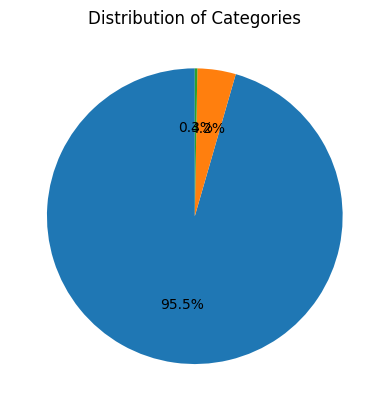

In [51]:
# Create a pie chart to show the distribution of capital cities vs. non-capital cities.

import matplotlib.pyplot as plt


# Create a pie chart
plt.pie(df["capital"].value_counts(), autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Categories')

# Show the pie chart

plt.show()


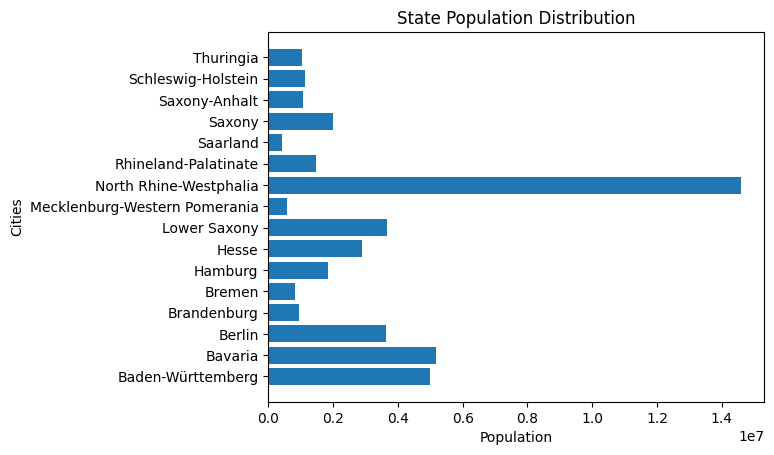

In [52]:
# Calculate and visualize the total population of cities in each state.
updated_df = df.groupby("admin_name")["population"].sum().reset_index()
states = updated_df["admin_name"]
population = updated_df["population"]
plt.barh(states, population)

# Add labels and title
plt.ylabel('Cities')
plt.xlabel('Population')
plt.title('State Population Distribution')

# Show the histogram
plt.show()

In [53]:

# Is there a relationship between a city's status as a capital and its population?
all_data = df.groupby("admin_name")
for group, data in all_data:
    group_data = df[df["admin_name"] == group].sort_values(by = "population", ascending = False).head().reset_index()
    print("Province :",group)
    print(group_data[["city","capital"]])
    print("#"*50)


Province : Baden-Württemberg
                   city capital
0             Stuttgart   admin
1             Karlsruhe   minor
2              Mannheim   minor
3  Freiburg im Breisgau   minor
4            Heidelberg   minor
##################################################
Province : Bavaria
         city capital
0      Munich   admin
1   Nuremberg   minor
2    Augsburg   minor
3  Regensburg   minor
4  Ingolstadt   minor
##################################################
Province : Berlin
     city  capital
0  Berlin  primary
##################################################
Province : Brandenburg
               city capital
0           Potsdam   admin
1           Cottbus   minor
2       Brandenburg   minor
3  Frankfurt (Oder)   minor
4       Oranienburg   minor
##################################################
Province : Bremen
          city capital
0       Bremen   admin
1  Bremerhaven     NaN
##################################################
Province : Hamburg
      city capital
0

In [54]:
df[df['capital'] == "primary"]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0


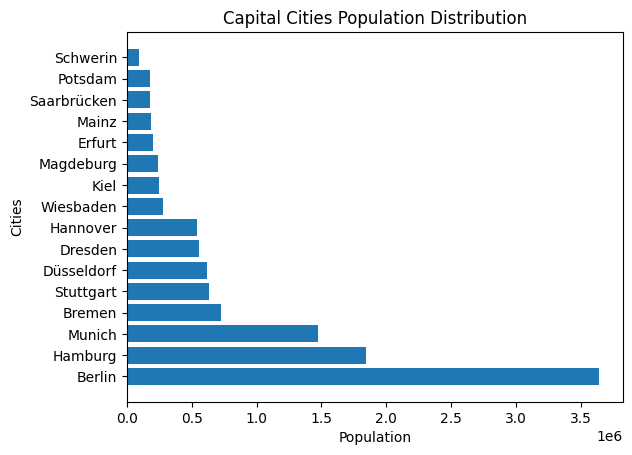

In [55]:
# Create a bar chart showing the population of the capital cities for each states.
updtaed_df = df[(df["capital"] == "admin") | (df["capital"] == "primary")]
cities = updtaed_df["city"]
population = updtaed_df["population"]
    
plt.barh(cities, population)

# Add labels and title
plt.ylabel('Cities')
plt.xlabel('Population')
plt.title('Capital Cities Population Distribution')

# Show the histogram
plt.show()



In [56]:

# What are the five most populous cities in each states?

all_data = df.groupby("admin_name")
for group, data in all_data:
    group_data = df[df["admin_name"] == group].sort_values(by = "population", ascending = False).head().reset_index()
    print("Province :",group)
    print(group_data["city"])
    print("#"*50)

Province : Baden-Württemberg
0               Stuttgart
1               Karlsruhe
2                Mannheim
3    Freiburg im Breisgau
4              Heidelberg
Name: city, dtype: object
##################################################
Province : Bavaria
0        Munich
1     Nuremberg
2      Augsburg
3    Regensburg
4    Ingolstadt
Name: city, dtype: object
##################################################
Province : Berlin
0    Berlin
Name: city, dtype: object
##################################################
Province : Brandenburg
0             Potsdam
1             Cottbus
2         Brandenburg
3    Frankfurt (Oder)
4         Oranienburg
Name: city, dtype: object
##################################################
Province : Bremen
0         Bremen
1    Bremerhaven
Name: city, dtype: object
##################################################
Province : Hamburg
0    Hamburg
Name: city, dtype: object
##################################################
Province : Hesse
0    Frankfurt
1